### Problem Statemant:

    * This Real Estate Market Analysis with Python project aims for you to preprocess, analyze, and visualize the real estate property data, thereby generating meaningful insights about property transactions and customer profiles.

### Data:
    * The data in this Real Estate Market Analysis with Python project is divided into two main tables. The first dataset contains details about the properties, including ID, building details, sale date, etc. The second dataset comprises customer details, such as customer ID, entity, name, surname, and more.

### Workflow:
    Part 1: Data Preprocessing
    Part 2: Descriptive Statistics
    Part 3: Data Analysis
    Part 4: Data Visualization
    part 5: Data modeling
    Part 6: Data Interpretation

In [1]:
import pandas as pd

 ### Data Preprocessing
           * The initial stage involves cleaning and preparing the data for real estate analysis, including handling missing values, correcting inconsistencies, and transforming data types if necessary. You must clean and preprocess the customers and property tables, ensure column names are in order and that missing values appear correctly, and apply any column data type changes you see fit.
          *  Finally, you should combine the properties and customers tables into one unified real estate dataset using the shared customer_idcolumn. You must consolidate inconsistencies or missing values to perform the following analysis and obtain the correct results

In [2]:
pd.options.display.max_columns = None

In [3]:
customer = pd.read_csv("/Users/godfather_101/Boopathi_workspace/Projects/365datascience/project-files-real-estate-market-analysis-with-python/Python-real_estate_analysis/customers.csv") ## Customer.csv
customer.head()

,Unnamed: 0,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [4]:
properties = pd.read_csv("/Users/godfather_101/Boopathi_workspace/Projects/365datascience/project-files-real-estate-market-analysis-with-python/Python-real_estate_analysis/properties.csv") ## properties.csv
properties.head()

,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [5]:
customer.info() ## info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         162 non-null    int64 
 1   ﻿customerid        162 non-null    object
 2   entity             162 non-null    object
 3   name               162 non-null    object
 4   surname            162 non-null    object
 5   birth_date         155 non-null    object
 6   sex                155 non-null    object
 7   country            162 non-null    object
 8   state              154 non-null    object
 9   purpose            162 non-null    object
 10  deal_satisfaction  162 non-null    int64 
 11  mortgage           162 non-null    object
 12  source             162 non-null    object
dtypes: int64(2), object(11)
memory usage: 16.6+ KB


In [6]:
properties.info() ## info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  267 non-null    int64  
 1   ﻿id         267 non-null    int64  
 2   building    267 non-null    int64  
 3   date_sale   267 non-null    object 
 4   type        267 non-null    object 
 5   property#   267 non-null    int64  
 6   area        267 non-null    float64
 7   price       267 non-null    object 
 8   status      267 non-null    object 
 9   customerid  195 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 21.0+ KB


In [7]:
properties["customerid"].isnull().sum() ## Null Values

72

In [8]:
### For customer dataframe fillna is good
def data_cleaning(data):
    data.drop_duplicates(inplace=True)
    for col in data.columns:
        if data[col].isnull().sum() > 0:
            if data[col].dtypes == "O":
                data[col].fillna(data[col].mode()[0],inplace=True)
            else:
                data[col].fillna(data[col].mean(),inplace=True)

In [9]:
data_cleaning(customer)

In [10]:
customer.isnull().sum() ## Missing Values

Unnamed: 0           0
﻿customerid          0
entity               0
name                 0
surname              0
birth_date           0
sex                  0
country              0
state                0
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [11]:
properties.info() # info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  267 non-null    int64  
 1   ﻿id         267 non-null    int64  
 2   building    267 non-null    int64  
 3   date_sale   267 non-null    object 
 4   type        267 non-null    object 
 5   property#   267 non-null    int64  
 6   area        267 non-null    float64
 7   price       267 non-null    object 
 8   status      267 non-null    object 
 9   customerid  195 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 21.0+ KB


In [12]:
data_cleaning(properties)

In [13]:
properties.isnull().sum()

Unnamed: 0    0
﻿id           0
building      0
date_sale     0
type          0
property#     0
area          0
price         0
status        0
customerid    0
dtype: int64

In [14]:
properties.drop('Unnamed: 0',axis=1,inplace=True) ## drop columns
customer.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
properties.describe() ## describtion of data

,﻿id,building,property#,area
count,267.000000,267.000000,267.000000,267.000000
mean,2975.142322,2.947566,27.580524,936.221311
std,1392.197474,1.391794,15.361437,284.894858
min,1002.000000,1.000000,1.000000,410.710000
25%,2015.500000,2.000000,14.500000,756.210000
50%,3024.000000,3.000000,28.000000,798.280000
75%,4031.500000,4.000000,40.000000,1121.950000
max,5052.000000,5.000000,59.000000,1942.500000


In [16]:
customer.describe()

,deal_satisfaction
count,162.000000
mean,3.456790
std,1.333276
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [17]:
properties.columns = ["id", 'building', 'date_sale', 'type', 'property', 'area', 'price',
       'status', "CustomerId"]

In [18]:
customer.columns = ["CustomerId", 'entity', 'name', 'surname', 'birth_date', 'sex',
       'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source']

In [19]:
properties.columns.values

array(['id', 'building', 'date_sale', 'type', 'property', 'area', 'price',
       'status', 'CustomerId'], dtype=object)

In [20]:
properties.shape,customer.shape ## shape

((267, 9), (162, 12))

In [21]:
customer

,CustomerId,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,12/25/1974,M,USA,California,Investment,5,No,Website
...,...,...,...,...,...,...,...,...,...,...,...,...
157,C0170,Individual,Emmy,Singh,12/3/1979,F,USA,Virginia,Investment,3,Yes,Agency
158,C0138,Individual,Colin,Campos,4/14/1942,M,USA,California,Home,3,No,Website
159,C0113,Individual,Anya,Stephenson,6/11/1959,F,USA,California,Home,4,No,Website
160,C0147,Individual,Parker,Poole,11/10/1951,M,USA,California,Home,5,No,Website


In [22]:
properties["CustomerId"] = properties["CustomerId"].apply(lambda x: x[1:-1])

In [23]:
df = pd.merge(customer,properties,how="outer",on="CustomerId") ## merging dataframes

In [24]:
df.head()

,CustomerId,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,id,building,date_sale,type,property,area,price,status
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website,4051,4,3/1/2007,Apartment,51,1608.84,"$496,266.41",Sold
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website,1045,1,10/1/2004,Apartment,45,756.21,"$248,525.12",Sold
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency,3036,3,10/1/2007,Apartment,36,1127.76,"$358,525.59",Sold
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website,4010,4,11/1/2007,Apartment,10,794.52,"$223,917.34",Sold
4,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website,4011,4,11/1/2007,Apartment,11,794.52,"$201,518.89",Sold


In [25]:
df.info() ## info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         267 non-null    object 
 1   entity             267 non-null    object 
 2   name               267 non-null    object 
 3   surname            267 non-null    object 
 4   birth_date         267 non-null    object 
 5   sex                267 non-null    object 
 6   country            267 non-null    object 
 7   state              267 non-null    object 
 8   purpose            267 non-null    object 
 9   deal_satisfaction  267 non-null    int64  
 10  mortgage           267 non-null    object 
 11  source             267 non-null    object 
 12  id                 267 non-null    int64  
 13  building           267 non-null    int64  
 14  date_sale          267 non-null    object 
 15  type               267 non-null    object 
 16  property           267 non

In [26]:
non_date = []  ## preprocessing
for i in range(len(df)):
    if "/" not in df["date_sale"][i]:
        non_date.append(i)

In [27]:
date = []
for i in range(len(df)):
    if i not in non_date:
        date.append(i)

In [28]:
df = df.iloc[date,:]

In [29]:
df["date_sale"] = pd.to_datetime(df["date_sale"],format='%m/%d/%Y') ### Date preprocessing
df["birth_date"] = pd.to_datetime(df["birth_date"],format='%m/%d/%Y')

In [30]:
df.head()

,CustomerId,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,id,building,date_sale,type,property,area,price,status
0,C0110,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4,Yes,Website,4051,4,2007-03-01,Apartment,51,1608.84,"$496,266.41",Sold
1,C0010,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1,No,Website,1045,1,2004-10-01,Apartment,45,756.21,"$248,525.12",Sold
2,C0132,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4,Yes,Agency,3036,3,2007-10-01,Apartment,36,1127.76,"$358,525.59",Sold
3,C0137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,No,Website,4010,4,2007-11-01,Apartment,10,794.52,"$223,917.34",Sold
4,C0137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,No,Website,4011,4,2007-11-01,Apartment,11,794.52,"$201,518.89",Sold


In [31]:
df["sale_month"] = df["date_sale"].dt.month ### Extract from datetime variable
df["sale_year"] = df["date_sale"].dt.year
df["sale_weekday"] = df["date_sale"].dt.weekday

In [32]:
df["birth_month"] = df["birth_date"].dt.month ## Datetime series - data Extraction 
df["birth_year"] = df["birth_date"].dt.year
df["birth_weekday"] = df["birth_date"].dt.weekday

In [33]:
df = df.reset_index(drop=True) ## reseting index

In [34]:
df.head()

,CustomerId,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,id,building,date_sale,type,property,area,price,status,sale_month,sale_year,sale_weekday,birth_month,birth_year,birth_weekday
0,C0110,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4,Yes,Website,4051,4,2007-03-01,Apartment,51,1608.84,"$496,266.41",Sold,3,2007,3,5,1968,5
1,C0010,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1,No,Website,1045,1,2004-10-01,Apartment,45,756.21,"$248,525.12",Sold,10,2004,4,11,1962,0
2,C0132,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4,Yes,Agency,3036,3,2007-10-01,Apartment,36,1127.76,"$358,525.59",Sold,10,2007,0,4,1959,1
3,C0137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,No,Website,4010,4,2007-11-01,Apartment,10,794.52,"$223,917.34",Sold,11,2007,3,11,1959,2
4,C0137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,No,Website,4011,4,2007-11-01,Apartment,11,794.52,"$201,518.89",Sold,11,2007,3,11,1959,2


In [35]:
def convert_price(x):
    return float(x[1:-1].split(",")[0]+x[0][1:-1].split(",")[1])

In [36]:
price = []  ## price column preprocessing
for i in range(len(df)):
    price.append(float(df["price"][i][1:].split(",")[0]+df["price"][i][1:].split(",")[1]))

In [37]:
df["price"] = price

In [38]:
df.head()

,CustomerId,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,id,building,date_sale,type,property,area,price,status,sale_month,sale_year,sale_weekday,birth_month,birth_year,birth_weekday
0,C0110,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4,Yes,Website,4051,4,2007-03-01,Apartment,51,1608.84,496266.41,Sold,3,2007,3,5,1968,5
1,C0010,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1,No,Website,1045,1,2004-10-01,Apartment,45,756.21,248525.12,Sold,10,2004,4,11,1962,0
2,C0132,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4,Yes,Agency,3036,3,2007-10-01,Apartment,36,1127.76,358525.59,Sold,10,2007,0,4,1959,1
3,C0137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,No,Website,4010,4,2007-11-01,Apartment,10,794.52,223917.34,Sold,11,2007,3,11,1959,2
4,C0137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,No,Website,4011,4,2007-11-01,Apartment,11,794.52,201518.89,Sold,11,2007,3,11,1959,2


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CustomerId         195 non-null    object        
 1   entity             195 non-null    object        
 2   name               195 non-null    object        
 3   surname            195 non-null    object        
 4   birth_date         195 non-null    datetime64[ns]
 5   sex                195 non-null    object        
 6   country            195 non-null    object        
 7   state              195 non-null    object        
 8   purpose            195 non-null    object        
 9   deal_satisfaction  195 non-null    int64         
 10  mortgage           195 non-null    object        
 11  source             195 non-null    object        
 12  id                 195 non-null    int64         
 13  building           195 non-null    int64         
 14  date_sale 

### Descriptive Statistics

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [41]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [42]:
plt.style.use('fivethirtyeight')

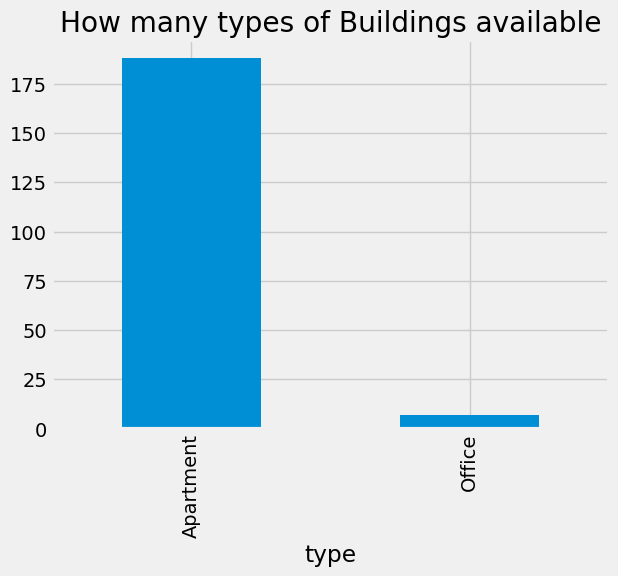

In [43]:
### Start by examining how many building types there are in the data set.
df["type"].value_counts().plot.bar()
plt.title('How many types of Buildings available')
plt.show()

In [44]:
df["mortgage_df"] = df["mortgage"].replace({"Yes":1,"No":0})

In [45]:
### Select columns of interest which to examine the totals by building type. Make a list with
### those variables, including building as the index variable. They are sold and mortgage
sold = df[df["status"]==' Sold ']
interest = ["type","mortgage_df"]

In [46]:
sold[interest]

,type,mortgage_df
0,Apartment,1
1,Apartment,0
2,Apartment,1
3,Apartment,0
4,Apartment,0
...,...,...
190,Apartment,1
191,Apartment,0
192,Apartment,0
193,Apartment,0


In [47]:
building = df.groupby("building")["price"].max() ### What is the highest priced building?

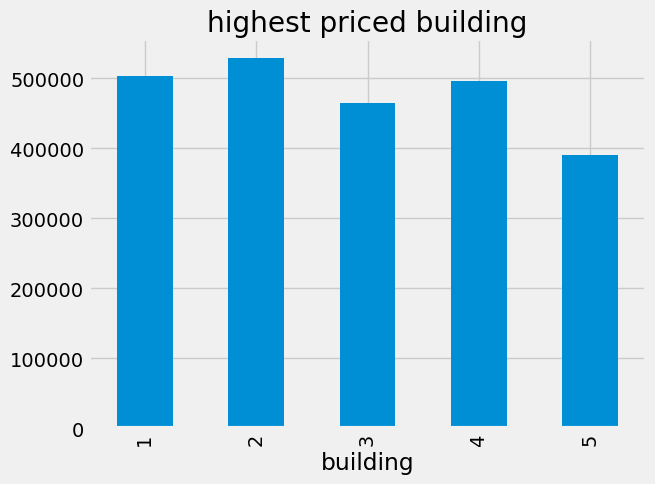

In [48]:
building.plot.bar()
plt.title("highest priced building")
plt.show()

In [49]:
df["status"].value_counts()

status
 Sold     195
Name: count, dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CustomerId         195 non-null    object        
 1   entity             195 non-null    object        
 2   name               195 non-null    object        
 3   surname            195 non-null    object        
 4   birth_date         195 non-null    datetime64[ns]
 5   sex                195 non-null    object        
 6   country            195 non-null    object        
 7   state              195 non-null    object        
 8   purpose            195 non-null    object        
 9   deal_satisfaction  195 non-null    int64         
 10  mortgage           195 non-null    object        
 11  source             195 non-null    object        
 12  id                 195 non-null    int64         
 13  building           195 non-null    int64         
 14  date_sale 

In [51]:
df[interest]

,type,mortgage_df
0,Apartment,1
1,Apartment,0
2,Apartment,1
3,Apartment,0
4,Apartment,0
...,...,...
190,Apartment,1
191,Apartment,0
192,Apartment,0
193,Apartment,0


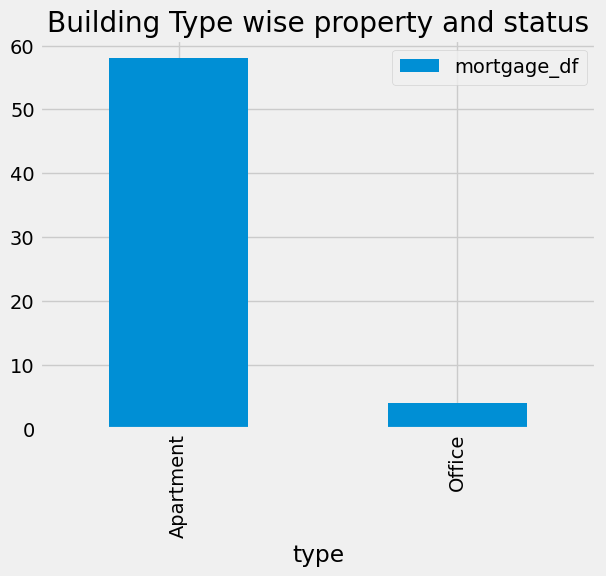

In [52]:
df[interest].groupby("type").agg({"mortgage_df":"sum"}).plot.bar()
plt.title("Building Type wise property and status")
plt.show()

In [53]:
columns_for_averages = ['type', 'area', 'price', 'deal_satisfaction']
averages_df = df[columns_for_averages]


In [54]:
averages_df

,type,area,price,deal_satisfaction
0,Apartment,1608.84,496266.41,4
1,Apartment,756.21,248525.12,1
2,Apartment,1127.76,358525.59,4
3,Apartment,794.52,223917.34,5
4,Apartment,794.52,201518.89,5
...,...,...,...,...
190,Apartment,794.52,235633.26,3
191,Apartment,794.52,244820.67,3
192,Apartment,781.07,206631.81,4
193,Apartment,798.28,230216.22,5


In [55]:
averages_df.groupby("type").mean()

,area,price,deal_satisfaction
type,,,
Apartment,901.608564,270038.541755,3.590426
Office,853.097143,253213.361429,3.857143


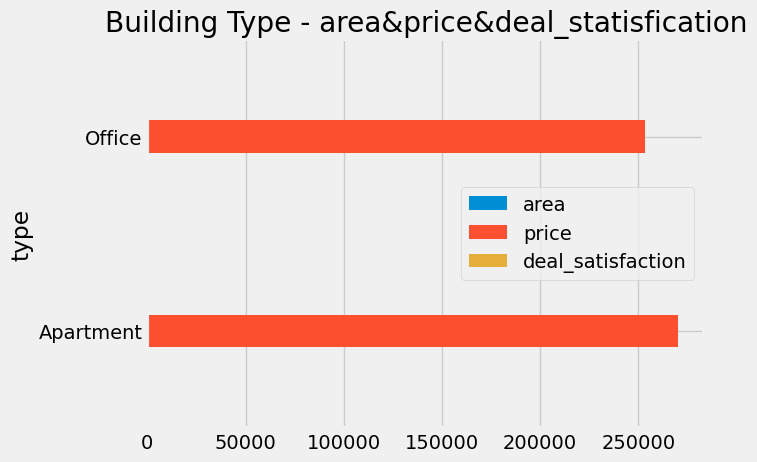

In [56]:
averages_df.groupby("type").mean().plot.barh() ## averages of dataframes
plt.title("Building Type - area&price&deal_statisfication")
plt.show()

In [57]:
totals_by_building_type = df.groupby('type').agg({'price': 'sum', 'mortgage_df': 'sum'}) ## total by building type
print(totals_by_building_type)

                 price  mortgage_df
type                               
Apartment  50767245.85           58
Office      1772493.53            4


In [58]:
### Determine the average values of area , price , and deal satisfaction per building type
columns_for_averages = ['type', 'area', 'price', 'deal_satisfaction']
averages_df = df[columns_for_averages]

averages_by_building_type = averages_df.groupby('type').mean()
print(averages_by_building_type)


                 area          price  deal_satisfaction
type                                                   
Apartment  901.608564  270038.541755           3.590426
Office     853.097143  253213.361429           3.857143


In [59]:
df.country.value_counts() # countries in data

country
USA        165
USA         12
Canada       7
Russia       4
Belgium      2
UK           2
Germany      1
Mexico       1
Denmark      1
Name: count, dtype: int64

In [60]:
### interest
interest = ["mortgage_df","price","country"]

In [61]:
df[interest]

,mortgage_df,price,country
0,1,496266.41,USA
1,0,248525.12,USA
2,1,358525.59,USA
3,0,223917.34,USA
4,0,201518.89,USA
...,...,...,...
190,1,235633.26,USA
191,0,244820.67,USA
192,0,206631.81,USA
193,0,230216.22,USA


In [62]:
df[interest].groupby("country").agg({"mortgage_df":"sum","price":"sum"})

,mortgage_df,price
country,,
Belgium,0,458150.94
Canada,0,1918485.69
Denmark,0,257183.48
Germany,0,205098.21
Mexico,0,338181.18
Russia,1,1115315.34
UK,0,440285.36
USA,61,44666887.16
USA,0,3140152.02


In [63]:
### Determine the average values of area , price , and deal satisfaction per building type
columns_for_averages = ['country', 'area', 'price', 'deal_satisfaction']
averages_df = df[columns_for_averages]

averages_by_building_type = averages_df.groupby('country').mean()
print(averages_by_building_type)


                area          price  deal_satisfaction
country                                               
Belgium   852.730000  229075.470000            3.00000
Canada    917.382857  274069.384286            5.00000
Denmark   785.480000  257183.480000            1.00000
Germany   743.410000  205098.210000            5.00000
Mexico   1283.450000  338181.180000            3.00000
Russia    903.757500  278828.835000            2.50000
UK        739.480000  220142.680000            4.00000
USA       901.756545  270708.407030            3.49697
USA       887.565833  261679.335000            4.75000


In [64]:
df.state.value_counts() # countries in data

state
California    134
Nevada         17
Oregon         11
Arizona        11
Colorado       11
Utah            5
Virginia        4
Wyoming         1
Kansas          1
Name: count, dtype: int64

In [65]:
### interest
interest = ["mortgage_df","price","state"]
df[interest]

,mortgage_df,price,state
0,1,496266.41,California
1,0,248525.12,California
2,1,358525.59,California
3,0,223917.34,California
4,0,201518.89,California
...,...,...,...
190,1,235633.26,Virginia
191,0,244820.67,California
192,0,206631.81,California
193,0,230216.22,California


In [66]:
df[interest].groupby("state").agg({"mortgage_df":"sum","price":"sum"})

,mortgage_df,price
state,,
Arizona,3,2854796.41
California,42,37286264.93
Colorado,5,2570287.08
Kansas,0,252185.99
Nevada,8,4720038.60
Oregon,1,2602526.55
Utah,1,1188776.40
Virginia,2,860576.75
Wyoming,0,204286.67


In [67]:
### Determine the average values of area , price , and deal satisfaction per building type
columns_for_averages = ['state', 'area', 'price', 'deal_satisfaction']
averages_df = df[columns_for_averages]

averages_by_building_type = averages_df.groupby('state').mean()
print(averages_by_building_type)

                  area          price  deal_satisfaction
state                                                   
Arizona     841.627273  259526.946364           3.363636
California  932.396567  278255.708433           3.738806
Colorado    777.010909  233662.461818           3.181818
Kansas      923.210000  252185.990000           3.000000
Nevada      921.692941  277649.329412           3.235294
Oregon      766.954545  236593.322727           3.090909
Utah        814.986000  237755.280000           3.200000
Virginia    730.712500  215144.187500           4.500000
Wyoming     701.660000  204286.670000           3.000000


In [68]:
import pandas as pd

# Assuming df is your DataFrame
# Assuming 'price' is the column you want to calculate the cumulative sum for

df['cumulative_price'] = df['price'].cumsum()

# Display the DataFrame with the cumulative sum column
print(df[['price', 'cumulative_price']])


         price  cumulative_price
0    496266.41         496266.41
1    248525.12         744791.53
2    358525.59        1103317.12
3    223917.34        1327234.46
4    201518.89        1528753.35
..         ...               ...
190  235633.26       51631492.17
191  244820.67       51876312.84
192  206631.81       52082944.65
193  230216.22       52313160.87
194  226578.51       52539739.38

[195 rows x 2 columns]


In [69]:
df["Age"] = df["sale_year"]-df["birth_year"]

In [70]:
df.head()

,CustomerId,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,id,building,date_sale,type,property,area,price,status,sale_month,sale_year,sale_weekday,birth_month,birth_year,birth_weekday,mortgage_df,cumulative_price,Age
0,C0110,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4,Yes,Website,4051,4,2007-03-01,Apartment,51,1608.84,496266.41,Sold,3,2007,3,5,1968,5,1,496266.41,39
1,C0010,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1,No,Website,1045,1,2004-10-01,Apartment,45,756.21,248525.12,Sold,10,2004,4,11,1962,0,0,744791.53,42
2,C0132,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4,Yes,Agency,3036,3,2007-10-01,Apartment,36,1127.76,358525.59,Sold,10,2007,0,4,1959,1,1,1103317.12,48
3,C0137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,No,Website,4010,4,2007-11-01,Apartment,10,794.52,223917.34,Sold,11,2007,3,11,1959,2,0,1327234.46,48
4,C0137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,No,Website,4011,4,2007-11-01,Apartment,11,794.52,201518.89,Sold,11,2007,3,11,1959,2,0,1528753.35,48


In [71]:
interval = []
for i in df["Age"]:
    if 10 < i < 20:
        interval.append("10-20")
    elif 20 < i < 30:
        interval.append("20-30")
    elif 30 < i < 40:
        interval.append("30-40")
    elif 40 < i < 50:
        interval.append("40-50")
    elif 50 < i < 60:
        interval.append("50-60")
    elif 60 < i < 70:
        interval.append("60-70")
    else:
        interval.append("70-80")

In [72]:
df["Age_Interval"] = interval

In [73]:
df.head()

,CustomerId,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,id,building,date_sale,type,property,area,price,status,sale_month,sale_year,sale_weekday,birth_month,birth_year,birth_weekday,mortgage_df,cumulative_price,Age,Age_Interval
0,C0110,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4,Yes,Website,4051,4,2007-03-01,Apartment,51,1608.84,496266.41,Sold,3,2007,3,5,1968,5,1,496266.41,39,30-40
1,C0010,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1,No,Website,1045,1,2004-10-01,Apartment,45,756.21,248525.12,Sold,10,2004,4,11,1962,0,0,744791.53,42,40-50
2,C0132,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4,Yes,Agency,3036,3,2007-10-01,Apartment,36,1127.76,358525.59,Sold,10,2007,0,4,1959,1,1,1103317.12,48,40-50
3,C0137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,No,Website,4010,4,2007-11-01,Apartment,10,794.52,223917.34,Sold,11,2007,3,11,1959,2,0,1327234.46,48,40-50
4,C0137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,No,Website,4011,4,2007-11-01,Apartment,11,794.52,201518.89,Sold,11,2007,3,11,1959,2,0,1528753.35,48,40-50


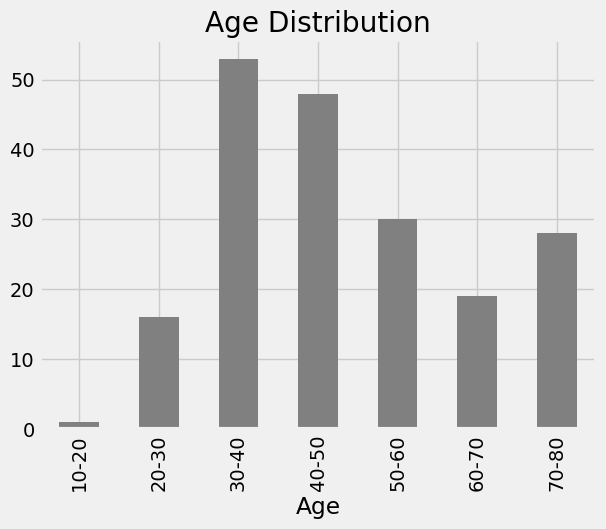

In [74]:
df.groupby("Age_Interval")["Age_Interval"].count().plot.bar(color="gray") ### Age-Distribution
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()

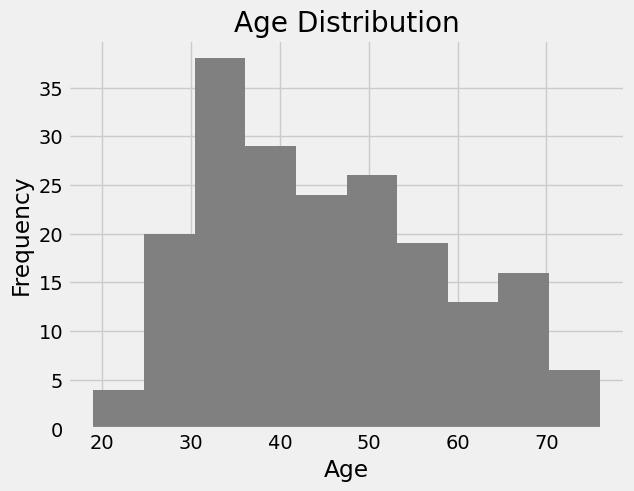

In [75]:
df["Age"].plot.hist(bins=10,color="gray") ### Age-Distribution
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()

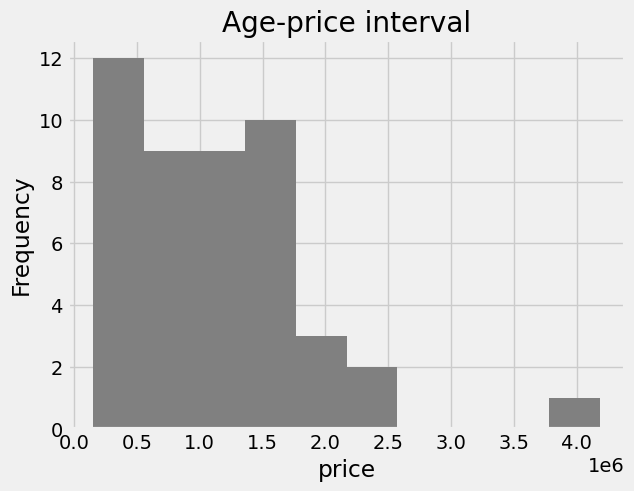

In [76]:
df.groupby("Age")["price"].sum().plot.hist(bins=10,color="grey") ### Age-price intervals
plt.xlabel("price")
plt.title("Age-price interval")
plt.show()

In [77]:
age_properties = df.groupby("Age")["price"].sum().reset_index()

In [78]:
age_properties.corr()

,Age,price
Age,1.000000,-0.262484
price,-0.262484,1.000000


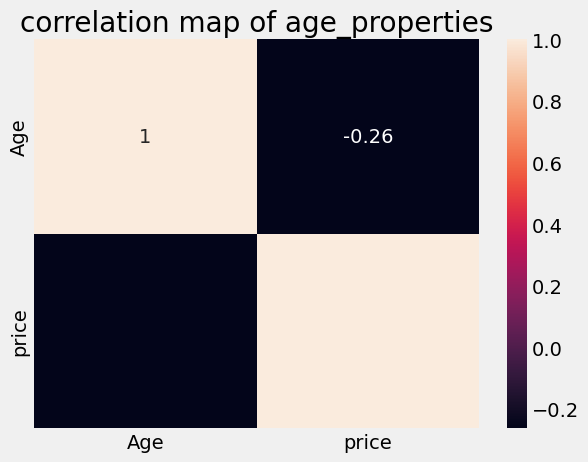

In [79]:
import seaborn as sns
sns.heatmap(age_properties.corr(),annot=True)
plt.title("correlation map of age_properties")
plt.show()

In [80]:
age_properties.cov()

,Age,price
Age,2.329802e+02,-2.958313e+06
price,-2.958313e+06,5.452098e+11


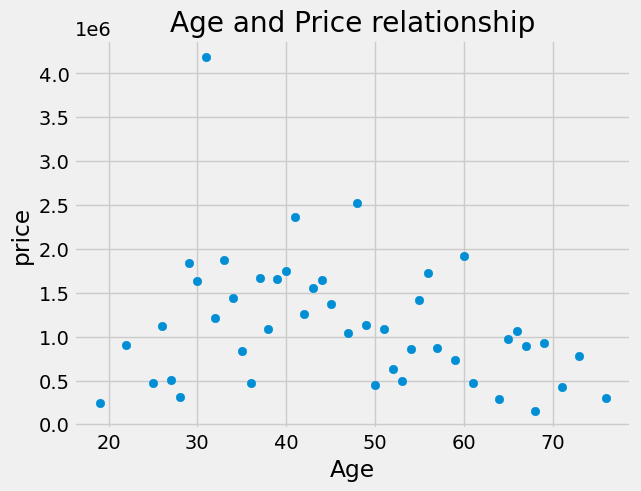

In [81]:
plt.scatter(age_properties["Age"],age_properties["price"])
plt.xlabel("Age")
plt.ylabel("price")
plt.title("Age and Price relationship")
plt.show()

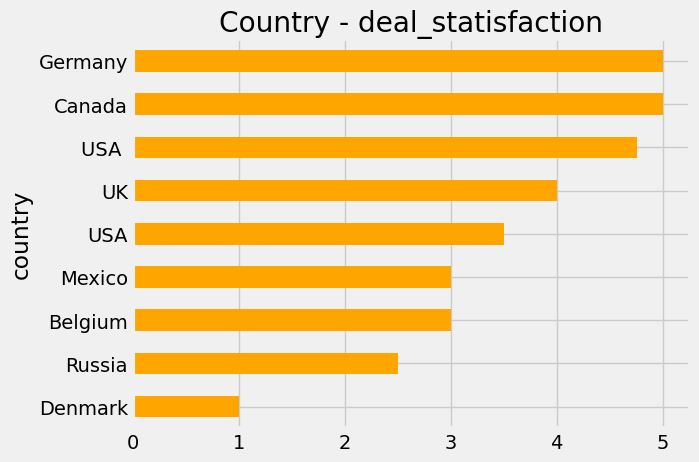

In [82]:
### What is the average deal satisfaction for each country? How does it look by state?
df.groupby("country")["deal_satisfaction"].mean().sort_values().plot.barh(color="orange")
plt.title("Country - deal_statisfaction")
plt.show()

<Axes: xlabel='sale_month'>

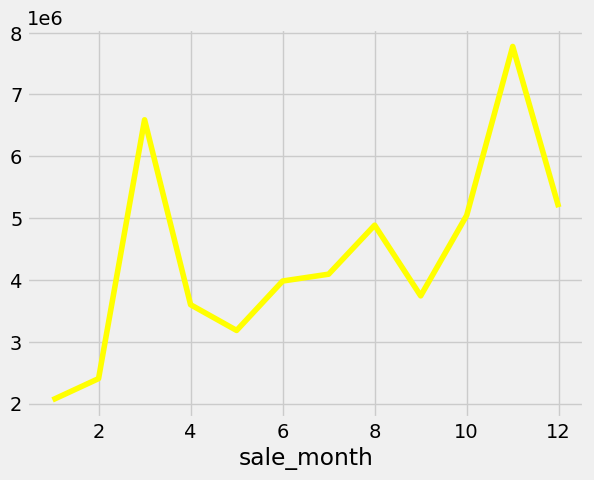

In [83]:
### What is the monthly revenue of the company?
df.groupby("sale_month")["price"].sum().plot(color="yellow")

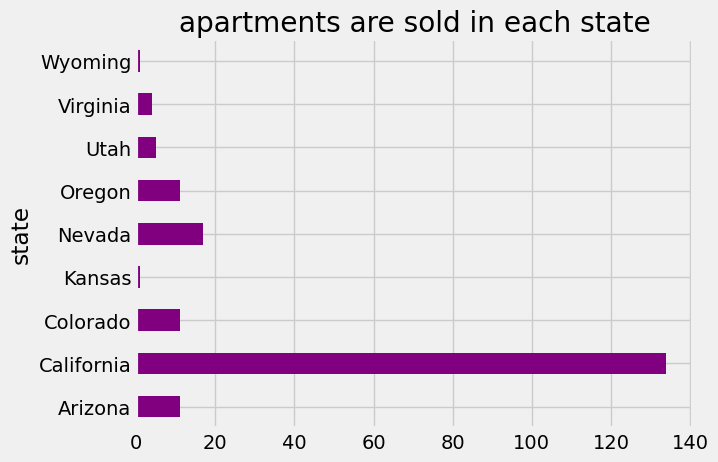

In [84]:
### How many apartments are sold in each state?
df[(df["status"]==' Sold ')].groupby("state")["type"].count().plot.barh(color="purple")
plt.title("apartments are sold in each state")
plt.show()

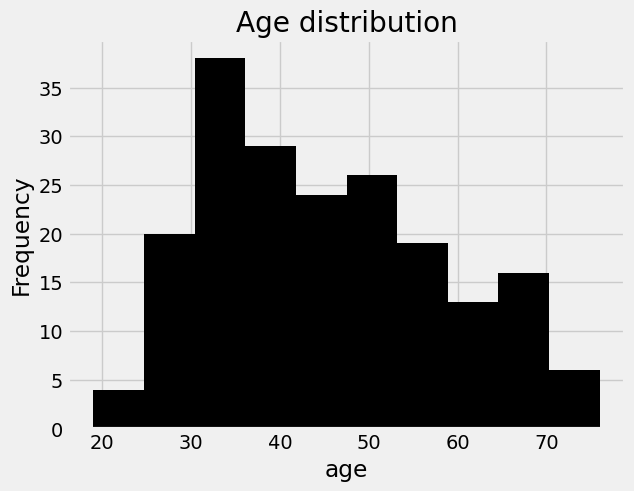

In [85]:
### What is the age distribution for customers? (Use the same age intervals or number of bins from the data analysis stage.)
df["Age"].plot.hist(bins=10,color="black")
plt.xlabel("age")
plt.title("Age distribution")
plt.show()

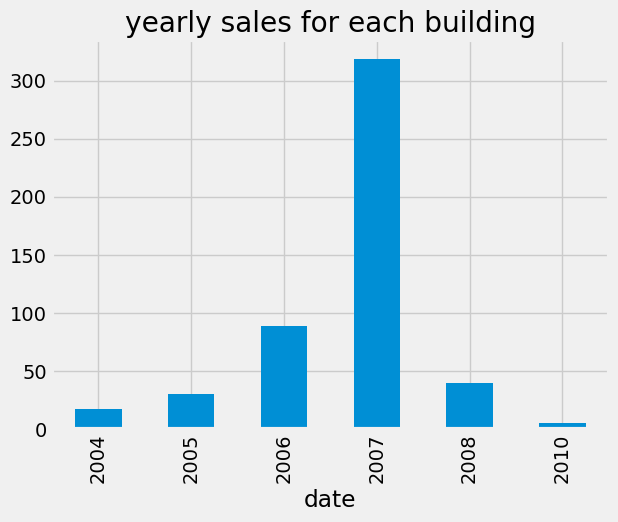

In [86]:
### What are the yearly sales for each building
df.groupby("sale_year")["building"].sum().plot.bar(stacked=True)
plt.xlabel("date")
plt.title("yearly sales for each building")
plt.show()

### Data Modeling:
    * Build machine learning models and evaluate it
    Evaluation:
     * Evaluation metrics (accuracy-95%) will be acceptable level 
     * tune the model


In [87]:
df.columns

Index(['CustomerId', 'entity', 'name', 'surname', 'birth_date', 'sex',
       'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source', 'id', 'building', 'date_sale', 'type', 'property', 'area',
       'price', 'status', 'sale_month', 'sale_year', 'sale_weekday',
       'birth_month', 'birth_year', 'birth_weekday', 'mortgage_df',
       'cumulative_price', 'Age', 'Age_Interval'],
      dtype='object')

In [88]:
ts = df.reset_index().sort_values(by="date_sale",ascending=True).set_index("date_sale")["price"]
ts.head()

date_sale
2004-03-01    169158.29
2004-03-01    410932.67
2004-03-01    117564.07
2004-06-01    229464.71
2004-06-01    377313.56
Name: price, dtype: float64

<Axes: xlabel='date_sale'>

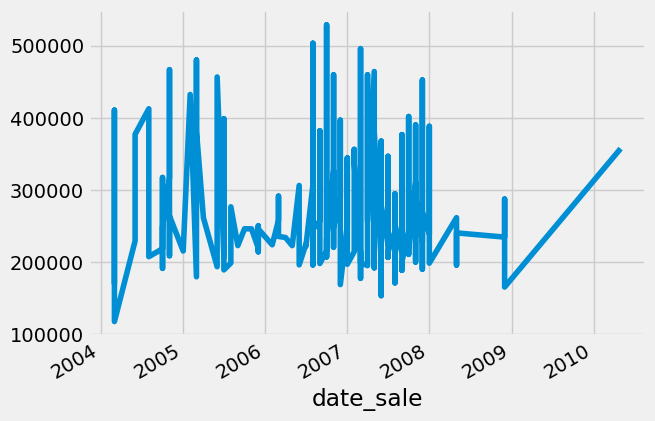

In [89]:
ts.plot()

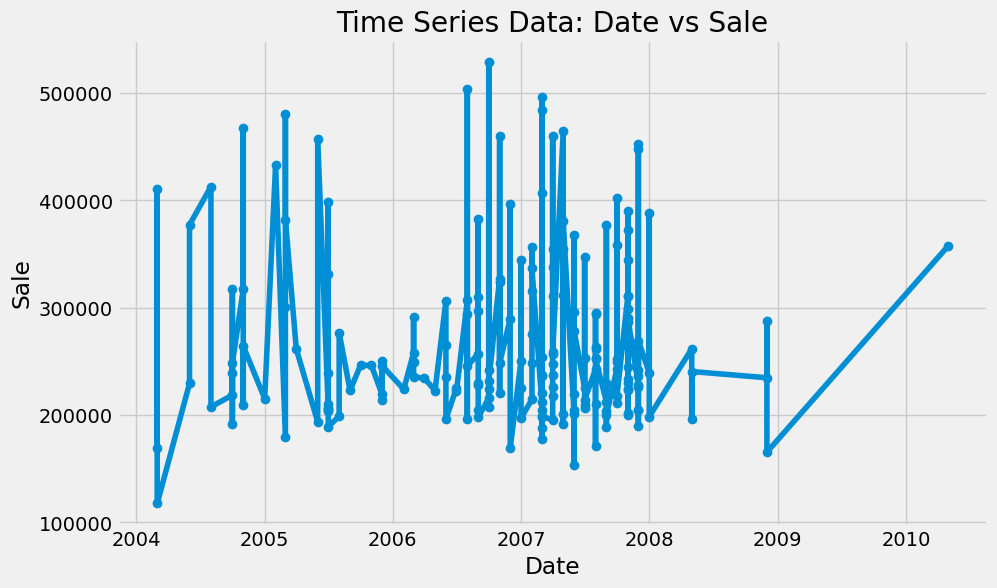

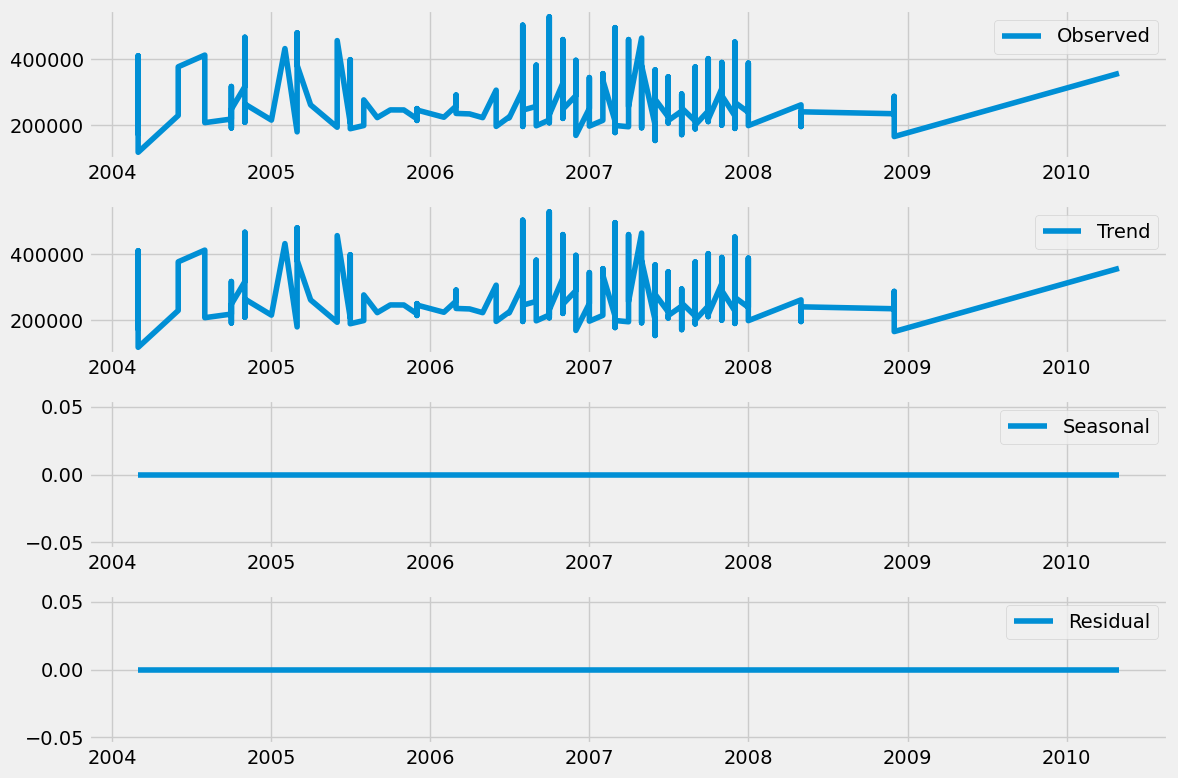

/Users/godfather_101/miniconda3/envs/projects/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/godfather_101/miniconda3/envs/projects/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/godfather_101/miniconda3/envs/projects/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Mean Squared Error (MSE): 10484889472.928696
Root Mean Squared Error (RMSE): 102395.74929130943
r2 score: -1.176743469404256


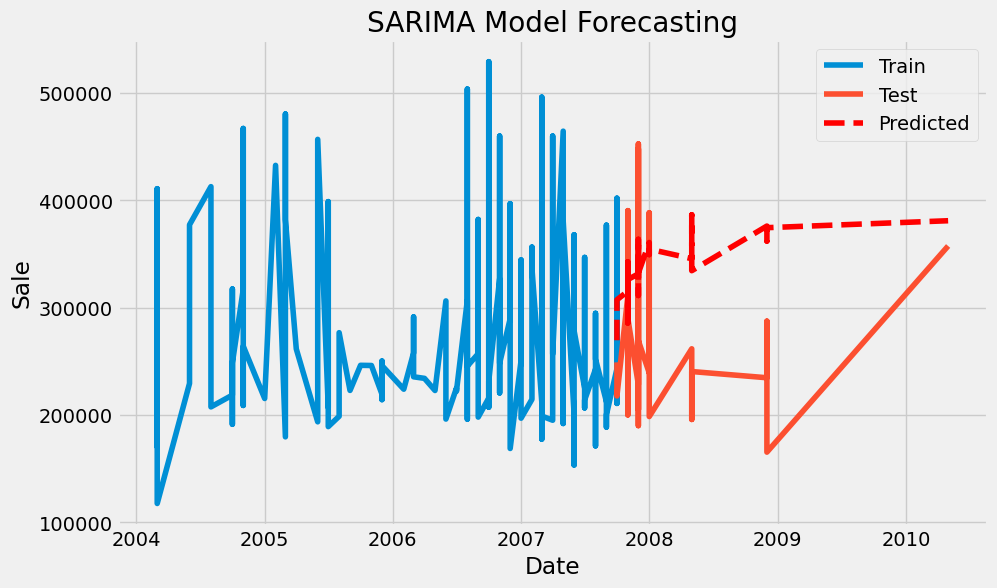

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose


# Visualize your data
plt.figure(figsize=(10, 6))
plt.plot(ts.index, ts, marker='o', linestyle='-')
plt.title('Time Series Data: Date vs Sale')
plt.xlabel('Date')
plt.ylabel('Sale')
plt.show()

result = seasonal_decompose(ts, model='additive', period=1)  # Adjust 'period' as needed

# Visualize the components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

# Train-test split
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

# SARIMA model
order = (1, 1, 1)  # Non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Seasonal order (P, D, Q, s)

model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
fit_model = model.fit(disp=False)

# Forecast
predictions = fit_model.get_forecast(steps=len(test))
predicted_values = predictions.predicted_mean

# Evaluate the model
mse = mean_squared_error(test, predicted_values)
rmse = sqrt(mse)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'r2 score: {r2_score(test,predicted_values)}')

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Predicted', linestyle='--', color='red')
plt.title('SARIMA Model Forecasting')
plt.xlabel('Date')
plt.ylabel('Sale')
plt.legend()
plt.show()


In [91]:
df = df.drop(["CustomerId","Age_Interval"],axis=1)
df.head()

,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,id,building,date_sale,type,property,area,price,status,sale_month,sale_year,sale_weekday,birth_month,birth_year,birth_weekday,mortgage_df,cumulative_price,Age
0,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4,Yes,Website,4051,4,2007-03-01,Apartment,51,1608.84,496266.41,Sold,3,2007,3,5,1968,5,1,496266.41,39
1,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1,No,Website,1045,1,2004-10-01,Apartment,45,756.21,248525.12,Sold,10,2004,4,11,1962,0,0,744791.53,42
2,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4,Yes,Agency,3036,3,2007-10-01,Apartment,36,1127.76,358525.59,Sold,10,2007,0,4,1959,1,1,1103317.12,48
3,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,No,Website,4010,4,2007-11-01,Apartment,10,794.52,223917.34,Sold,11,2007,3,11,1959,2,0,1327234.46,48
4,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,No,Website,4011,4,2007-11-01,Apartment,11,794.52,201518.89,Sold,11,2007,3,11,1959,2,0,1528753.35,48


In [92]:
df = df.drop([111],axis=0)

In [93]:
df = df.drop([120],axis=0)
df["state"].value_counts()

state
California    134
Nevada         17
Oregon         11
Arizona        11
Colorado       11
Utah            5
Virginia        4
Name: count, dtype: int64

In [94]:
df.reset_index(inplace=True)

In [95]:
df = df[df["country"]=="USA"]

In [96]:
df["source"].value_counts()

source
Website    98
Agency     48
Client     17
Name: count, dtype: int64

In [97]:
df.head()

,index,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,id,building,date_sale,type,property,area,price,status,sale_month,sale_year,sale_weekday,birth_month,birth_year,birth_weekday,mortgage_df,cumulative_price,Age
0,0,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4,Yes,Website,4051,4,2007-03-01,Apartment,51,1608.84,496266.41,Sold,3,2007,3,5,1968,5,1,496266.41,39
1,1,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1,No,Website,1045,1,2004-10-01,Apartment,45,756.21,248525.12,Sold,10,2004,4,11,1962,0,0,744791.53,42
2,2,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4,Yes,Agency,3036,3,2007-10-01,Apartment,36,1127.76,358525.59,Sold,10,2007,0,4,1959,1,1,1103317.12,48
3,3,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,No,Website,4010,4,2007-11-01,Apartment,10,794.52,223917.34,Sold,11,2007,3,11,1959,2,0,1327234.46,48
4,4,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,No,Website,4011,4,2007-11-01,Apartment,11,794.52,201518.89,Sold,11,2007,3,11,1959,2,0,1528753.35,48


In [98]:
categorical_data = [col for col in df.columns if df[col].dtypes=="O"]
numerical_data = [col for col in df.columns if df[col].dtypes!="O"]

In [99]:
categorical_data,numerical_data

(['entity',
  'name',
  'surname',
  'sex',
  'country',
  'state',
  'purpose',
  'mortgage',
  'source',
  'type',
  'status'],
 ['index',
  'birth_date',
  'deal_satisfaction',
  'id',
  'building',
  'date_sale',
  'property',
  'area',
  'price',
  'sale_month',
  'sale_year',
  'sale_weekday',
  'birth_month',
  'birth_year',
  'birth_weekday',
  'mortgage_df',
  'cumulative_price',
  'Age'])

In [100]:
### Label Encoding
from sklearn.preprocessing import LabelEncoder
labels = {}
for i in categorical_data:
    label = LabelEncoder()
    df[i] = label.fit_transform(df[i])
    labels[i] = label

In [101]:
for col in ["sale_year","birth_year"]:
    label = LabelEncoder()
    df[col] = label.fit_transform(df[col])
    labels[col] = label

In [103]:
import pickle
with open("labels.pkl","wb") as file:
    pickle.dump(label,file)

In [104]:
df.head()

,index,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,id,building,date_sale,type,property,area,price,status,sale_month,sale_year,sale_weekday,birth_month,birth_year,birth_weekday,mortgage_df,cumulative_price,Age
0,0,1,80,72,1968-05-11,0,0,1,0,4,1,2,4051,4,2007-03-01,0,51,1608.84,496266.41,0,3,3,3,5,31,5,1,496266.41,39
1,1,1,131,97,1962-11-26,1,0,1,0,1,0,2,1045,1,2004-10-01,0,45,756.21,248525.12,0,10,0,4,11,25,0,0,744791.53,42
2,2,1,76,40,1959-04-07,1,0,1,0,4,1,0,3036,3,2007-10-01,0,36,1127.76,358525.59,0,10,3,0,4,23,1,1,1103317.12,48
3,3,1,121,47,1959-11-25,1,0,1,0,5,0,2,4010,4,2007-11-01,0,10,794.52,223917.34,0,11,3,3,11,23,2,0,1327234.46,48
4,4,1,121,47,1959-11-25,1,0,1,0,5,0,2,4011,4,2007-11-01,0,11,794.52,201518.89,0,11,3,3,11,23,2,0,1528753.35,48


<Axes: >

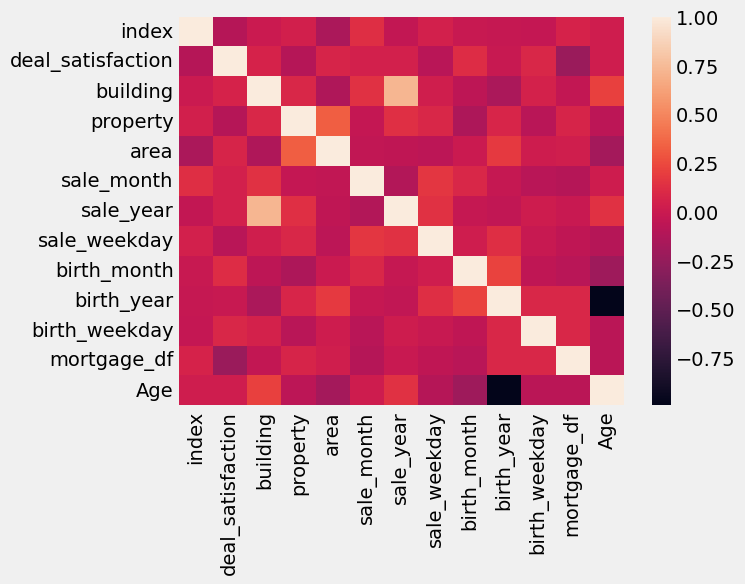

In [105]:
sns.heatmap(df[numerical_data].drop(["date_sale","price","cumulative_price","id","birth_date"],axis=1).corr())

In [106]:
features = df[numerical_data].drop(["date_sale","price","id","cumulative_price","birth_date"],axis=1)
target = df["price"]

In [107]:
column = df[numerical_data].drop(["date_sale","price","id","cumulative_price","birth_date"],axis=1).columns

In [108]:
for col in categorical_data:
    print(df[col].value_counts())
    print("------------------")

entity
1    155
0      8
Name: count, dtype: int64
------------------
name
5      3
60     3
75     2
11     2
20     2
      ..
110    1
100    1
63     1
59     1
58     1
Name: count, Length: 141, dtype: int64
------------------
surname
21     8
130    3
28     2
50     2
115    2
      ..
133    1
31     1
78     1
66     1
8      1
Name: count, Length: 139, dtype: int64
------------------
sex
1    99
0    64
Name: count, dtype: int64
------------------
country
0    163
Name: count, dtype: int64
------------------
state
1    106
3     17
4     11
2     11
0      9
5      5
6      4
Name: count, dtype: int64
------------------
purpose
0    110
1     53
Name: count, dtype: int64
------------------
mortgage
0    102
1     61
Name: count, dtype: int64
------------------
source
2    98
0    48
1    17
Name: count, dtype: int64
------------------
type
0    156
1      7
Name: count, dtype: int64
------------------
status
0    163
Name: count, dtype: int64
------------------


In [109]:
# def outlier_handling(col):
#     q1 = df[col].quantile(.25)
#     q3 = df[col].quantile(.75)
#     iqr = q3-q1
#     low = q1 - 1.5*iqr
#     high = q3+1.5*iqr
#     return df[(df[col]<high)&(df[col]>low)]
# df_new = outlier_handling("area")
# plt.subplot(1,2,1)
# df["area"].plot.box()
# plt.ylabel("Boxplot of area before Iqr outlier removal")
# plt.subplot(1,2,2)
# df_new["area"].plot.box()
# plt.ylabel("Boxplot of area after Iqr outlier removal")
# plt.tight_layout()
# plt.show()

In [110]:
from sklearn.model_selection import train_test_split
X_train_stat,X_test_stat,y_train_stat,y_test_stat =  train_test_split(features,target,test_size=.2,shuffle=True,random_state=2)

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_stat = scaler.fit_transform(X_train_stat)
X_test_stat = scaler.transform(X_test_stat)

In [112]:
import statsmodels.api as sm
statmodel = sm.OLS(y_train_stat,X_train_stat).fit()
statmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.076
Model:                            OLS   Adj. R-squared (uncentered):             -0.027
Method:                 Least Squares   F-statistic:                             0.7362
Date:                Sun, 10 Dec 2023   Prob (F-statistic):                       0.724
Time:                        23:27:07   Log-Likelihood:                         -1811.3
No. Observations:                 130   AIC:                                      3649.
Df Residuals:                     117   BIC:                                      3686.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1312.1675   2.58e+04      0.051      0.959   -4.97e+04    5.23e+04
x2         -1700.4164   2.67e+04     -0.064      0.949   -5.45e+04    5.11e+04
x3           363.9703   4.07e+04      0.009      0.993   -8.03e+04    8.11e+04
x4          3421.1654   2.85e+04      0.120      0.905    -5.3e+04    5.99e+04
x5          7.643e+04   2.85e+04      2.684      0.008       2e+04    1.33e+05
x6           919.5000   2.88e+04      0.032      0.975   -5.61e+04    5.79e+04
x7          -121.5295    6.8e+04     -0.002      0.999   -1.35e+05    1.35e+05
x8          -617.0400    2.7e+04     -0.023      0.982    -5.4e+04    5.28e+04
x9          -628.5712   2.66e+04     -0.024      0.981   -5.33e+04     5.2e+04
x10         1.019e+04   5.97e+05      0.017      0.986   -1.17e+06    1.19e+06
x11          235.1057   2.62e+04      0.009      0.993   -5.16e+04    5.21e+04
x12         -283.7803   2.64e+04     -0.011      0.991   -5.26e+04     5.2e+04
x13         7914.1710   6.01e+05      0.013      0.990   -1.18e+06     1.2e+06
==============================================================================
Omnibus:                       14.205   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               24.288
Skew:                           0.499   Prob(JB):                     5.32e-06
Kurtosis:                       4.868   Cond. No.                         51.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
summary = statmodel.summary()
p_value =summary.tables[1]
p_value = pd.DataFrame(p_value,columns=pd.DataFrame(p_value).iloc[0,:]).iloc[1:,4:]
p_value["Features"] = column.tolist()
p_value = p_value.iloc[:,[0,-1]]
p_value

,P>|t|,Features
1,0.959,index
2,0.949,deal_satisfaction
3,0.993,building
4,0.905,property
5,0.008,area
6,0.975,sale_month
7,0.999,sale_year
8,0.982,sale_weekday
9,0.981,birth_month
10,0.986,birth_year


In [114]:
def EvaluationMatrix(y_test,y_pred):
    print("R2:",r2_score(y_pred,y_test))
    print("MSE:",mean_squared_error(y_pred,y_test))
EvaluationMatrix(y_test_stat,statmodel.predict(X_test_stat))

R2: -13.141860542629216
MSE: 73606695009.13387


In [115]:
result = pd.DataFrame([y_test_stat,statmodel.predict(X_test_stat)],index=["Actual","Predicted"]).T
result.head()

,Actual,Predicted
22,290031.26,-28778.637423
93,293876.27,NaN
169,372001.70,NaN
152,263790.81,NaN
3,223917.34,-30508.735108


### Machine learning Apporach

In [116]:
X = df.drop(["index","entity","country","cumulative_price","date_sale","id","birth_date","name","surname","price","status","sex","state","purpose","mortgage","source","building","type","sale_year","mortgage_df"],axis=1)
y = df["price"]

In [117]:
df["state"].value_counts()

state
1    106
3     17
4     11
2     11
0      9
5      5
6      4
Name: count, dtype: int64

In [118]:
X.head()

,deal_satisfaction,property,area,sale_month,sale_weekday,birth_month,birth_year,birth_weekday,Age
0,4,51,1608.84,3,3,5,31,5,39
1,1,45,756.21,10,4,11,25,0,42
2,4,36,1127.76,10,0,4,23,1,48
3,5,10,794.52,11,3,11,23,2,48
4,5,11,794.52,11,3,11,23,2,48


In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=.2,shuffle=True,random_state=2)

In [120]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
pipe = Pipeline([("scaler",StandardScaler()),("model",LinearRegression())])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
def EvaluationMatrix(y_test,y_pred):
    print("R2:",r2_score(y_pred,y_test))
    print("MSE:",mean_squared_error(y_pred,y_test))
EvaluationMatrix(y_test,y_pred)

R2: 0.8781477321533403
MSE: 637463372.0155246


In [121]:
from sklearn.ensemble import RandomForestRegressor
pipe = Pipeline([("scaler",StandardScaler()),("model",RandomForestRegressor(n_estimators=200))])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
def EvaluationMatrix(y_test,y_pred):
    print("R2:",r2_score(y_pred,y_test))
    print("MSE:",mean_squared_error(y_pred,y_test))
EvaluationMatrix(y_test,y_pred)

R2: 0.8772349629072392
MSE: 622550250.2982845


In [122]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
model = RandomForestRegressor(n_estimators=200,random_state=0)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [124]:
model.score(X_test,y_test)

0.8925118547614058

In [125]:
y_pred = model.predict(X_test)
EvaluationMatrix(y_test,y_pred)

R2: 0.8757770020802191
MSE: 618863624.4026654


### Hyperparameter tuning 
    Manually tune the parameters
    use gridsearchcv

In [126]:
from sklearn.model_selection import GridSearchCV
### Manual method
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [127]:
lr_model.score(X_test,y_test)

0.889281333053587

In [128]:
y_pred_lr = lr_model.predict(X_test)
EvaluationMatrix(y_pred_lr,y_test)

R2: 0.889281333053587
MSE: 637463372.0155246


In [129]:
lr_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [130]:
### GridSearchCv
params = {'n_jobs': [1,-1,None],'positive': [True,False],'copy_X': [True,False], 'fit_intercept': [False,True]}
grid = GridSearchCV(lr_model,params,cv=5,scoring='r2')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [False, True],
                         'n_jobs': [1, -1, None], 'positive': [True, False]},
             scoring='r2')

In [131]:
grid.best_score_

0.8482450872763228

In [132]:
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}

In [133]:
EvaluationMatrix(y_test,grid.predict(X_test))

R2: 0.876214251262374
MSE: 646266292.6466774


In [134]:
### Use ridge or lasso models
from sklearn.linear_model import Ridge,Lasso
lasso = Lasso(max_iter=100,alpha = .001,positive=True,random_state=0,warm_start=True,precompute=True,selection="random")
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, max_iter=100, positive=True, precompute=True, random_state=0,
      selection='random', warm_start=True)

In [135]:
y_pred_lasso = lasso.predict(X_test)
EvaluationMatrix(y_test,y_pred_lasso)

R2: 0.8761969428516798
MSE: 646843852.8231558


In [136]:
lasso.get_params()

{'alpha': 0.001,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 100,
 'positive': True,
 'precompute': True,
 'random_state': 0,
 'selection': 'random',
 'tol': 0.0001,
 'warm_start': True}

In [137]:
ridge = Ridge(max_iter=10,alpha = .001,positive=True,solver='lbfgs',random_state=0)
ridge.fit(X_train,y_train)

Ridge(alpha=0.001, max_iter=10, positive=True, random_state=0, solver='lbfgs')

In [138]:
y_pred_ridge = ridge.predict(X_test)
EvaluationMatrix(y_test,y_pred_ridge)

R2: 0.8763244051086428
MSE: 645400648.3216332


In [139]:
y_pred_lasso = lasso.predict(X_test)
y_pred_lasso

array([332084.2233967 , 277720.29456448, 335093.36901044, 239372.6018758 ,
       237673.51955019, 218322.48806463, 173669.46918039, 174341.08381999,
       274559.2643298 , 338068.00534704, 274413.67900034, 238546.70261599,
       210606.07483646, 202452.14936567, 415214.22826246, 332771.43970181,
       243214.44451412, 247329.59704371, 244635.56678701, 470110.8479876 ,
       242468.57831973, 324776.22628876, 242616.28254449, 243177.70179605,
       238479.32007052, 270902.71557533, 275059.19293514, 242833.96879552,
       238716.41886853, 205242.91784924, 335829.01642813, 476500.96309641,
       226549.06612309])

In [140]:
X.columns

Index(['deal_satisfaction', 'property', 'area', 'sale_month', 'sale_weekday',
       'birth_month', 'birth_year', 'birth_weekday', 'Age'],
      dtype='object')

In [141]:
y_pred_lasso = lasso.predict(X_test)
predicted = pd.DataFrame(y_pred_lasso.tolist(),columns=["Predicted"])
predicted["Actual"] = y_test.tolist()
predicted.head()

,Predicted,Actual
0,332084.223397,290031.26
1,277720.294564,293876.27
2,335093.369010,372001.70
3,239372.601876,263790.81
4,237673.519550,223917.34


In [142]:
y_pred_lr = lr_model.predict(X_test)
predicted_lr = pd.DataFrame(y_pred_lr.tolist(),columns=["Predicted"])
predicted_lr["Actual"] = y_test.tolist()
predicted_lr.head()

,Predicted,Actual
0,330054.827414,290031.26
1,278493.292567,293876.27
2,332693.688486,372001.70
3,239057.598795,263790.81
4,235066.698709,223917.34


In [143]:
y_pred_lr = pipe.predict(X_test)
predicted_lr = pd.DataFrame(y_pred_lr.tolist(),columns=["Predicted"])
predicted_lr["Actual"] = y_test.tolist()
predicted_lr.head()

,Predicted,Actual
0,150312.2649,290031.26
1,150312.2649,293876.27
2,150312.2649,372001.70
3,150312.2649,263790.81
4,150312.2649,223917.34


In [144]:
y_pred_lr = model.predict(X_test)
predicted_lr = pd.DataFrame(y_pred_lr.tolist(),columns=["Predicted"])
predicted_lr["Actual"] = y_test.tolist()
predicted_lr.head()

,Predicted,Actual
0,317384.52945,290031.26
1,292635.61890,293876.27
2,313345.03835,372001.70
3,228477.25925,263790.81
4,211709.13600,223917.34


In [145]:
y_pred_lr = ridge.predict(X_test)
y_pred_lr = y_pred_lr*1000
predicted_lr = pd.DataFrame(y_pred_lr.tolist(),columns=["Predicted"])
predicted_lr["Actual"] = y_test.tolist()
predicted_lr.head()

,Predicted,Actual
0,3.313318e+08,290031.26
1,2.788630e+08,293876.27
2,3.343311e+08,372001.70
3,2.394561e+08,263790.81
4,2.368112e+08,223917.34


### Conclusion:
     # Based on the Model Performance rf Model performance gradually goood 
     # mean-squared-error is low compare to others model performance
     # so further deployment ridge model will use and also check feature importances
     # try xgboost/ada boost

In [146]:
import xgboost as xgb

In [147]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}


In [148]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(n_estimators=20)
xgboost.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=20, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [149]:
y_pred_xgboost = xgboost.predict(X_test)
EvaluationMatrix(y_test,y_pred_xgboost)

R2: 0.8503130039487383
MSE: 795077303.6645312


In [150]:
grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=20,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [151]:
grid_search.best_score_

-1503664780.02587

In [152]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [153]:
EvaluationMatrix(y_test,grid_search.predict(X_test))

R2: 0.8523876705528867
MSE: 739845365.4348266


In [154]:
predicted = pd.DataFrame([y_pred_xgboost],index=["Predicted"]).T
predicted["Actual"] = y_test.tolist()
predicted

,Predicted,Actual
0,322382.531250,290031.26
1,264784.468750,293876.27
2,318564.187500,372001.70
3,219698.000000,263790.81
4,209784.250000,223917.34
5,225914.421875,196142.19
6,177560.453125,171262.65
7,188341.718750,169158.29
8,283603.406250,326885.34
9,342878.406250,358525.59


In [158]:
features_imp = pd.DataFrame([X.columns,model.feature_importances_]).T
features_imp.columns = ["features","importance level"]
features_imp

,features,importance level
0,deal_satisfaction,0.007976
1,property,0.014463
2,area,0.910083
3,sale_month,0.007269
4,sale_weekday,0.00764
5,birth_month,0.009402
6,birth_year,0.017414
7,birth_weekday,0.007451
8,Age,0.018302


<Axes: >

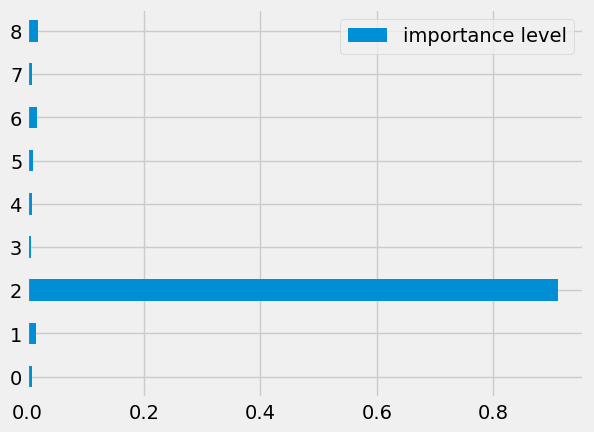

In [159]:
features_imp.plot.barh()

In [160]:
### Feature importance 

<Axes: xlabel='features'>

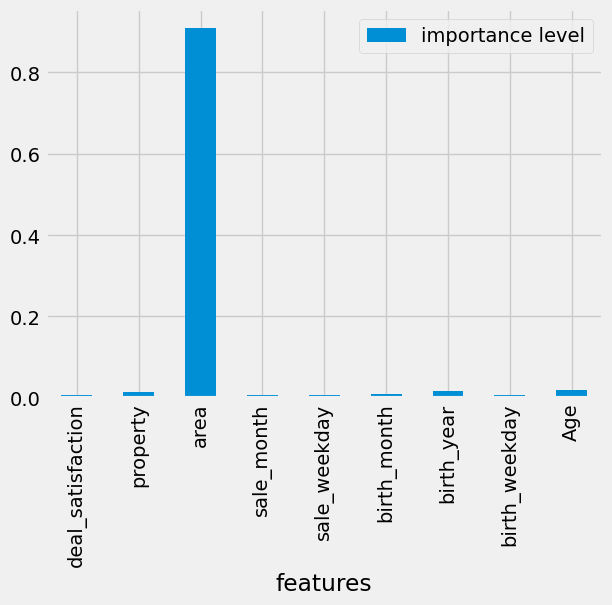

In [161]:
features_imp.set_index("features").plot.bar()

In [162]:
import pickle
with open("RealERstateAnalysisModel.pkl","wb") as file:
    pickle.dump(model,file)

In [163]:
model

RandomForestRegressor(n_estimators=200, random_state=0)

### Conclusion : 
     # Data Science:
        Best model is RandomForest . Store in Pickle. Use for futher Deployment

    # Data Analysis:
        Data interpretation below.  if u need will create dashboard

### Deployment :
     Creating Api and website

** Flask used for the deployment portion . Flask is micro-framework used for create website **

*** Mlops may be used***

### Data Interpretation
    Based on the data analysis, what can you conclude about the customer profile, as well as the building characteristics?

    * Which customer age bracket has the most buyers potential?
       based on the histogram 30-40 has the most buyers potential

    * Which Factor more important to predict price?
        area - most important factor
        
    * What is the highest priced building?
        Apartment - 2 building higher price
        
    *  What is the most sought after building?
        area is the most sought after building

### From DataScience And Machine Learning:

    Datascience is the advanced analytical. predicting future or foresight`

    Machine learning is part of artificial intelligence. using artificial intelligence to predict foresight(forecast)

    Webscraping and api data retrival used for data collection 